#### 1.  Perform basic EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

In [3]:
df = pd.read_csv("house_price.csv")

In [5]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [7]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [9]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [11]:
print("Shape of the Dataset")
print (df.shape)

Shape of the Dataset
(13200, 7)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [17]:
# informations like count, mean, min, max, standard deviation and quantities
df.describe

<bound method NDFrame.describe of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                

In [19]:
# total numbers of observations in each column
df.count()

location          13200
size              13200
total_sqft        13200
bath              13200
price             13200
bhk               13200
price_per_sqft    13200
dtype: int64

df.price.value_counts()

In [21]:
#unique classes in the column
df.price.unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [23]:
# Missing values the Dataset

df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [25]:
df.duplicated().sum()

1049

In [27]:
df.drop_duplicates(inplace =True)

In [29]:
df.shape

(12151, 7)

#### 2.Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
##### a.Mean and Standard deviation
##### b.Percentile method
##### c. IQR(Inter quartile range method)
##### d.Z Score method


a. Mean and Standard Deviation Method

In this method, we will calculate the mean and standard deviation for the price_per_sqft column. After that we will establish an acceptable range (3*std). All the values beyond these ranges will be removed.

In [33]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
threshold = 3
lower_limit = mean - threshold * std
upper_limit = mean + threshold * std

df_trimmed_mean_std = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df) - len(df_trimmed_mean_std)
print("The number of rows cleared:",rows_cleared)


The number of rows cleared: 5


#### b.Percentile Method

#### In this method, we will define 5th and 95th percentile for the price_per_sqft column. All the values less than 5th percentile and greater than 95th percentile will be removed.

In [73]:
lower_limit = np.percentile(df['price_per_sqft'],5)
upper_limit = np.percentile(df['price_per_sqft'],95)

df_trimmed_percentiles = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

rows_cleared = len(df) - len(df_trimmed_percentiles)
print("The number of rows cleared:",rows_cleared)


The number of rows cleared: 1211


##### c. IQR (Inter Quartile Range Method)

##### In this method, we will establish 25th and 75th percentile (Q1 and Q3 respectively). All values that do not fall within this range will be removed

In [37]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_trimmed_IQR = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft']<= upper_limit)]
rows_cleared = len(df) - len(df_trimmed_IQR)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 1142


##### d. Z-Score Method

##### In this method, Z-Score defines the number of standard deviation a data point is from the mean. If the Z-Score is beyond an acceptable range (3*std), we will remove those values.

In [39]:
from scipy.stats import zscore

#calculate zscore for 'price_per_sqft' column
df['z_score'] = zscore(df['price_per_sqft'])

#define critical value
critical_value = 3

#remove rows where thw zscore is greater than 3 or less than -3
df_trimmed_z_score = df[(df['z_score']> critical_value) | (df['z_score'] < -critical_value)]

#check the number of rows
rows_cleared = len(df) - len(df_trimmed_z_score)
print("The number of rows cleared:",rows_cleared)

The number of rows cleared: 12146


In [41]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039861
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031625
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034412
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016971
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034907
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,-0.014409
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026777
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025845


#### Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

##### Box plot original

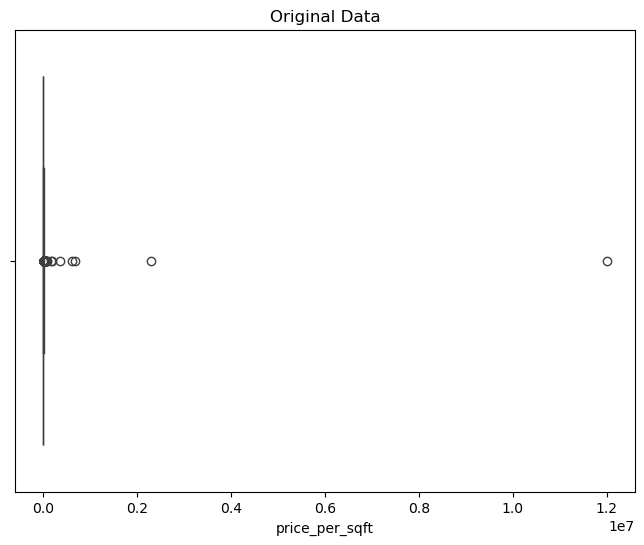

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price_per_sqft'])
plt.title('Original Data')
plt.show()

##### Boxplot for Mean and Standard Deviation Method

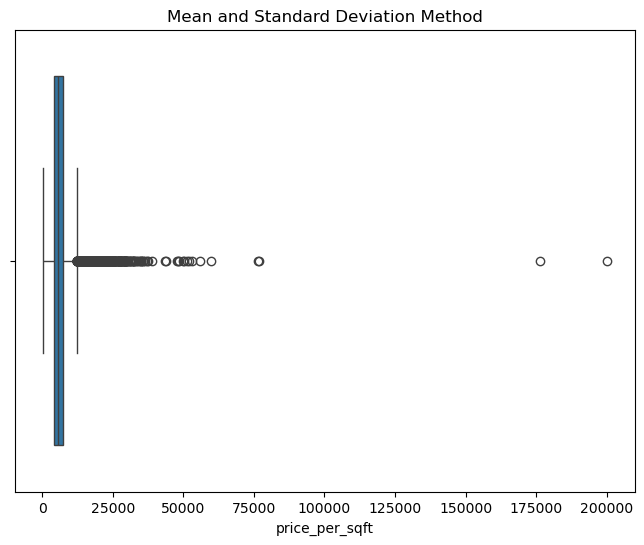

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_trimmed_mean_std['price_per_sqft'])
plt.title("Mean and Standard Deviation Method")
plt.show()

##### Box plot for Percentile Method

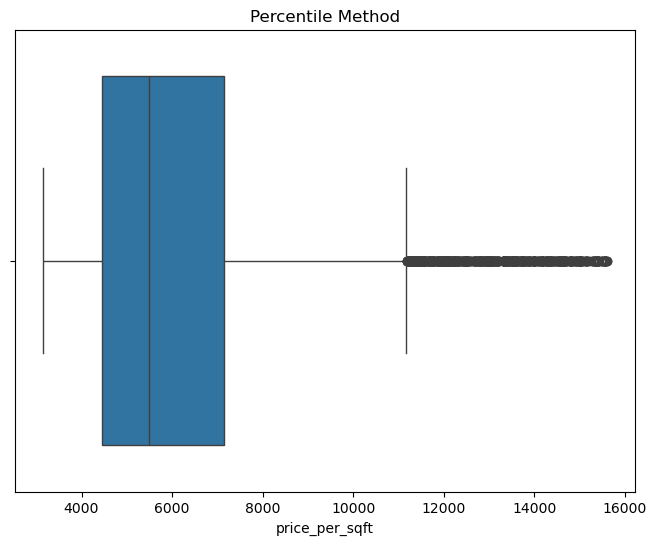

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_trimmed_percentiles['price_per_sqft'])
plt.title('Percentile Method')
plt.show()

##### Box Plot for IQR

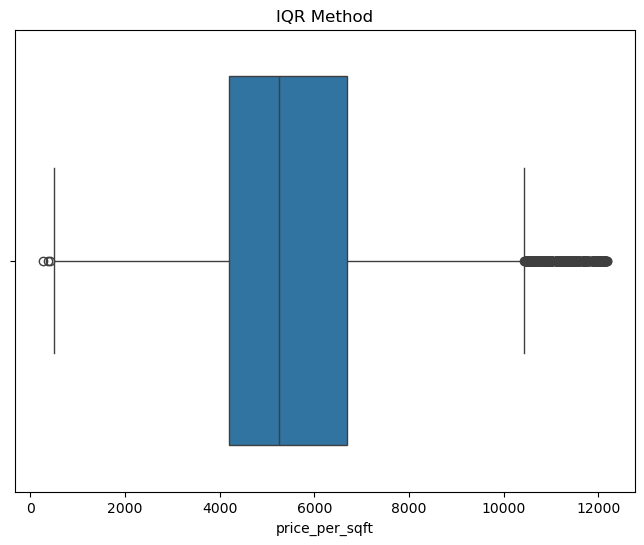

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_trimmed_IQR['price_per_sqft'])
plt.title('IQR Method')
plt.show()

##### Box Plot for Z-Score Method 

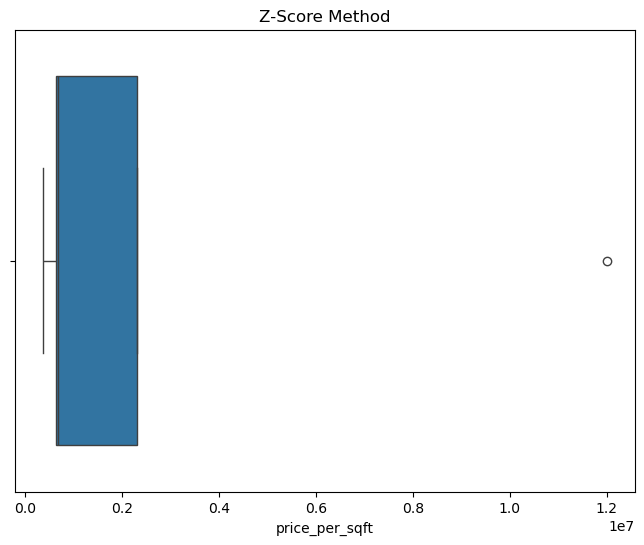

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_trimmed_z_score['price_per_sqft'])
plt.title('Z-Score Method')
plt.show()

#### IQR Method: This method strikes a balance between removing extreme outliers and retaining the core structure of the dataset. 
#### Percentile Method: A close second, particularly if you aim to preserve more data by adjusting the percentiles.

##### 4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

In [53]:
#skewness and Kurtosis before transformation
import scipy.stats as stats
original_skewness = stats.skew(df['price_per_sqft'])
original_kurtosis = stats.kurtosis(df['price_per_sqft'])

print("Original Skewness:", original_skewness)
print("Original Kurtosis:", original_kurtosis)


Original Skewness: 103.88920549434178
Original Kurtosis: 11131.230839805388


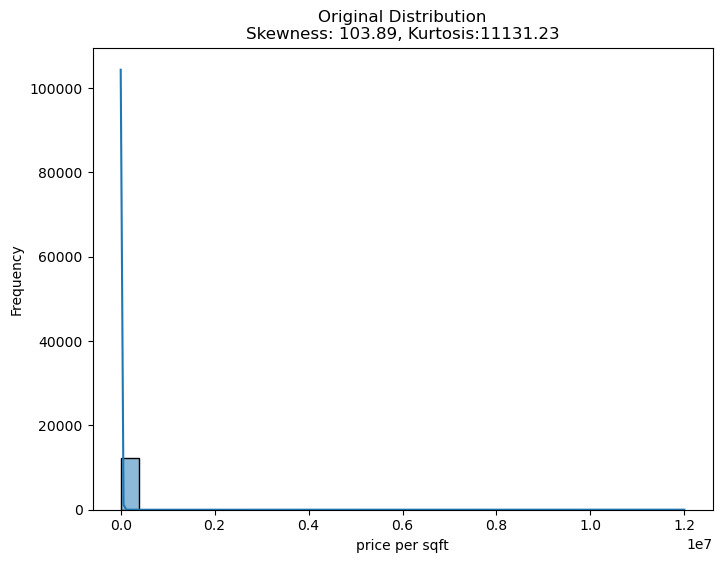

In [55]:
#Histplot to check normality of price_per_sqft column
plt.figure(figsize=(8,6))
sns.histplot(df['price_per_sqft'], kde=True , bins=30)
plt.title(f'Original Distribution\nSkewness: {original_skewness:.2f}, Kurtosis:{original_kurtosis:.2f}')
plt.xlabel('price per sqft')
plt.ylabel('Frequency')
plt.show()


In [57]:
#apply log transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])


In [59]:
# skewness and kurtosis after log transformation
import scipy.stats as stats
log_skewness = stats.skew(df['log_price_per_sqft'])
log_kurtosis = stats.kurtosis(df['log_price_per_sqft'])

print("Log Transformation Skewness:",log_skewness)
print("Log Transformation Kurtosis:",log_kurtosis)

Log Transformation Skewness: 1.400870354404583
Log Transformation Kurtosis: 9.404434549652514


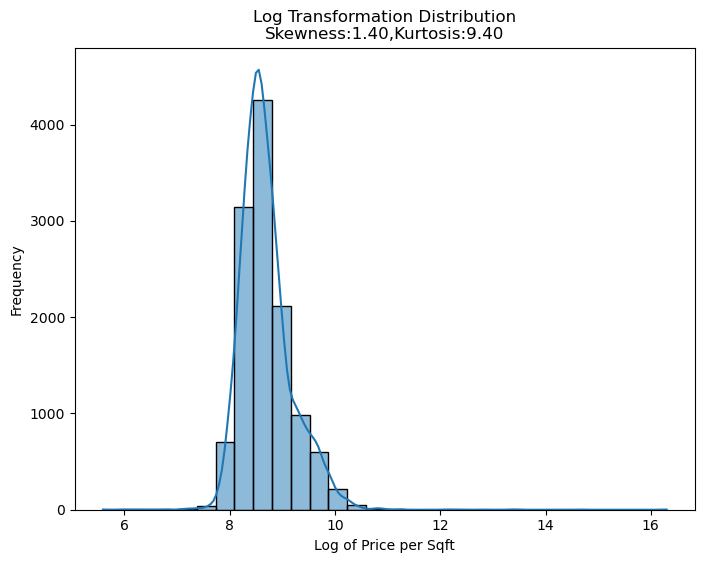

In [61]:
# Histplot to check normality of after log transformation
plt.figure(figsize=(8,6))
sns.histplot(df['log_price_per_sqft'],kde=True,bins=30)
plt.title(f'Log Transformation Distribution\nSkewness:{log_skewness:.2f},Kurtosis:{log_kurtosis:.2f}')
plt.xlabel('Log of Price per Sqft')
plt.ylabel('Frequency')
plt.show()

#### 5. Check the correlation between all the numerical columns and plot heatmap.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13198
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            12151 non-null  object 
 1   size                12151 non-null  object 
 2   total_sqft          12151 non-null  float64
 3   bath                12151 non-null  float64
 4   price               12151 non-null  float64
 5   bhk                 12151 non-null  int64  
 6   price_per_sqft      12151 non-null  int64  
 7   z_score             12151 non-null  float64
 8   log_price_per_sqft  12151 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 949.3+ KB


In [65]:
# select numerical columns to create a correlation matrix
num_columns = df[['total_sqft','bath','price','bhk','price_per_sqft']]

#calculate correlation matrix
correlation_matrix = num_columns.corr()
correlation_matrix


,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


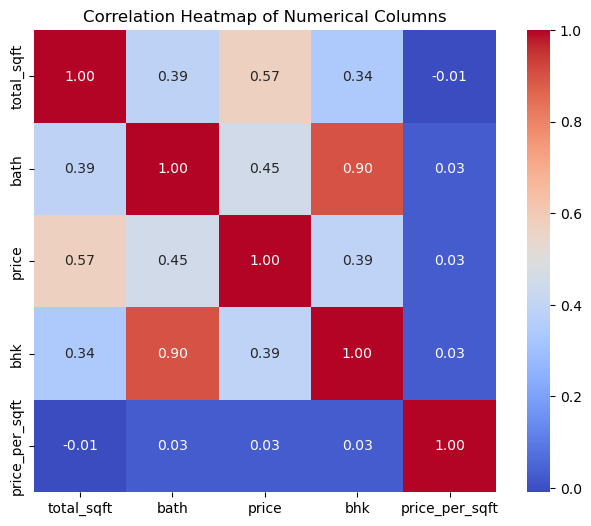

In [67]:
#plot Heatmap for correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , fmt=".2f", cmap="coolwarm", cbar=True, square= True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

#### 6. Draw Scatter plot between the variables to check the correlation between them.

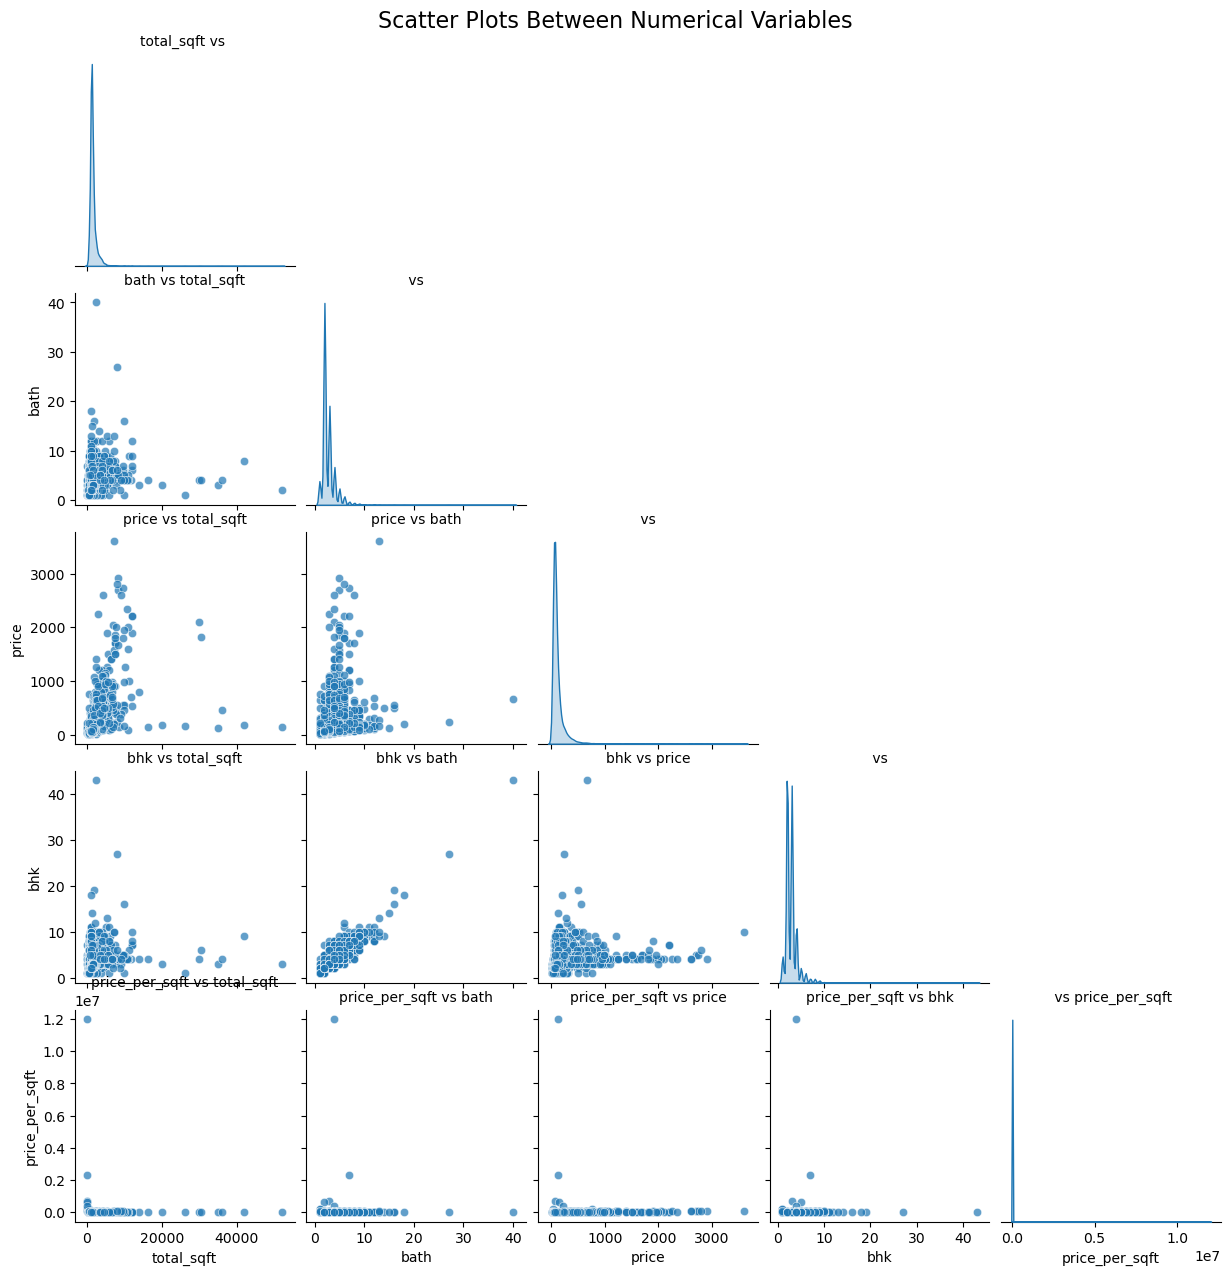

In [77]:
#select numerical columns
num_columns = df[['total_sqft','bath','price','bhk','price_per_sqft']]

#pair plot to create scatter plots between each pair variables
pairplot = sns.pairplot(num_columns, diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})

#adding labels and titles
for ax in pairplot.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=10)
        ax.set_ylabel(ax.get_ylabel(), fontsize=10)
        ax.set_title(f'{ax.get_ylabel()} vs {ax.get_xlabel()}', fontsize=10, loc='center')
plt.suptitle('Scatter Plots Between Numerical Variables', y=1.02, fontsize=16)
plt.show()
                      
 


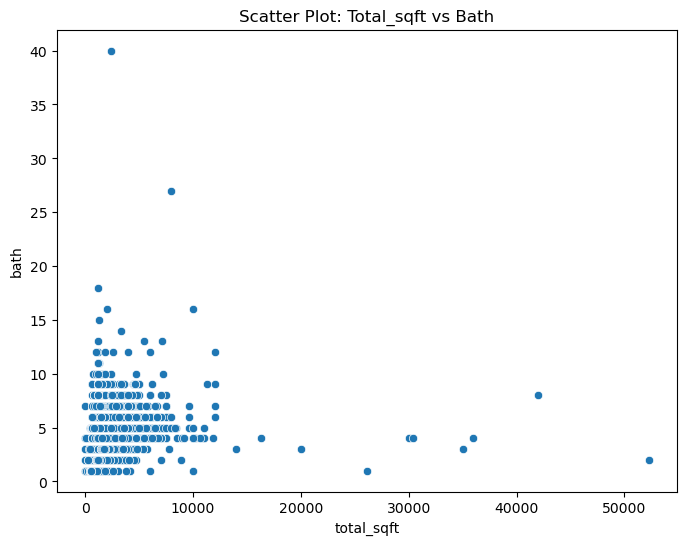

In [79]:
#bath vs total_sqft
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_sqft', y='bath', data=df)
plt.title('Scatter Plot: Total_sqft vs Bath')
plt.xlabel('total_sqft')
plt.ylabel('bath')
plt.show()

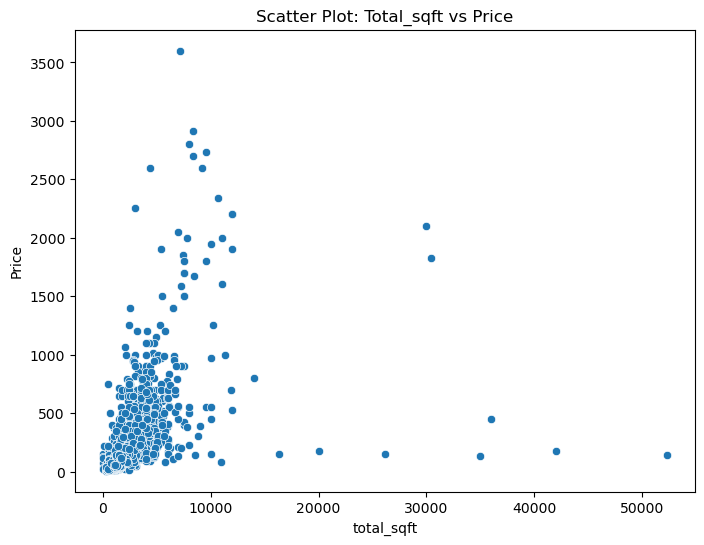

In [81]:
#total_sqft vs price
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot: Total_sqft vs Price')
plt.xlabel('total_sqft')
plt.ylabel('Price')
plt.show()

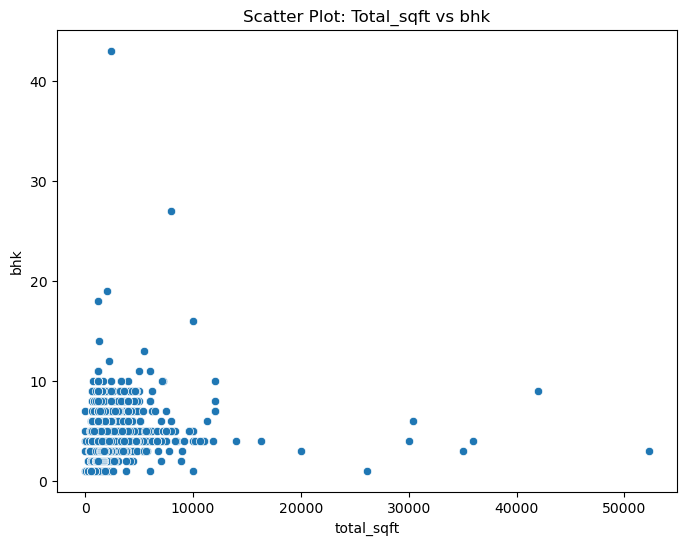

In [85]:
# total_sqft vs BHK
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_sqft', y='bhk', data= df)
plt.title('Scatter Plot: Total_sqft vs bhk')
plt.xlabel('total_sqft')
plt.ylabel('bhk')
plt.show()

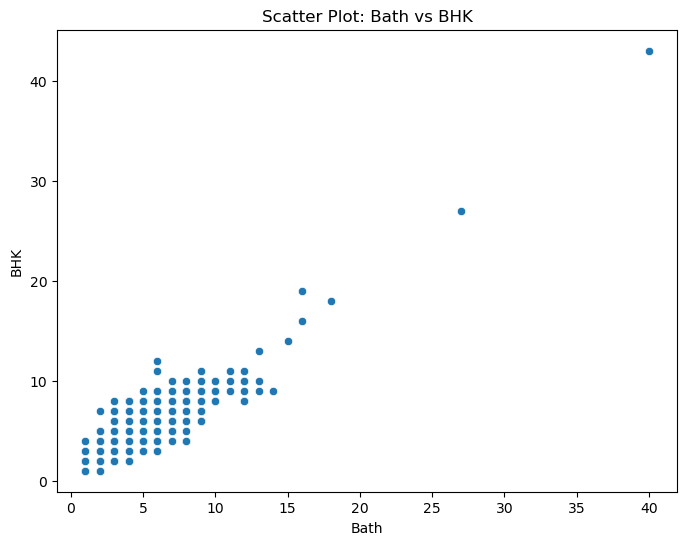

In [89]:
# Bath vs BHK
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='bhk',data=df)
plt.title('Scatter Plot: Bath vs BHK')
plt.xlabel('Bath')
plt.ylabel('BHK')
plt.show()

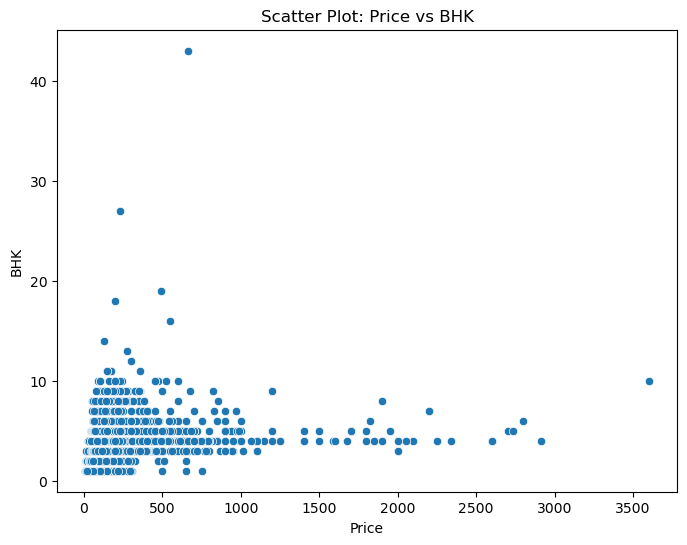

In [93]:
# Price vs BHK
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='bhk',data=df)
plt.title('Scatter Plot: Price vs BHK')
plt.xlabel('Price')
plt.ylabel('BHK')
plt.show()

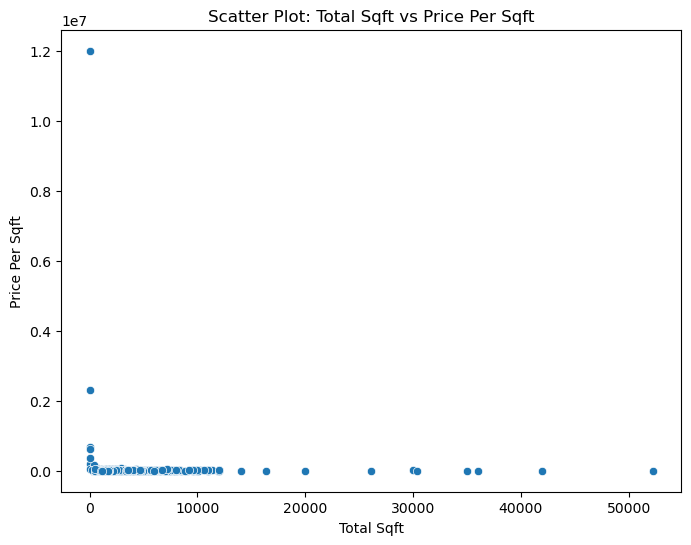

In [97]:
 #Total_sqft vs Price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price_per_sqft',data=df)
plt.title('Scatter Plot: Total Sqft vs Price Per Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price Per Sqft')
plt.show()


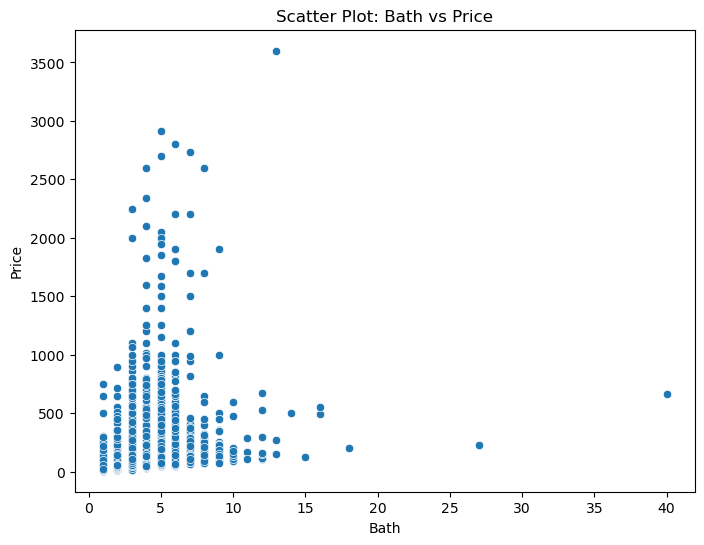

In [99]:
# Bath vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price',data=df)
plt.title('Scatter Plot: Bath vs Price')
plt.xlabel('Bath')
plt.ylabel('Price')
plt.show()


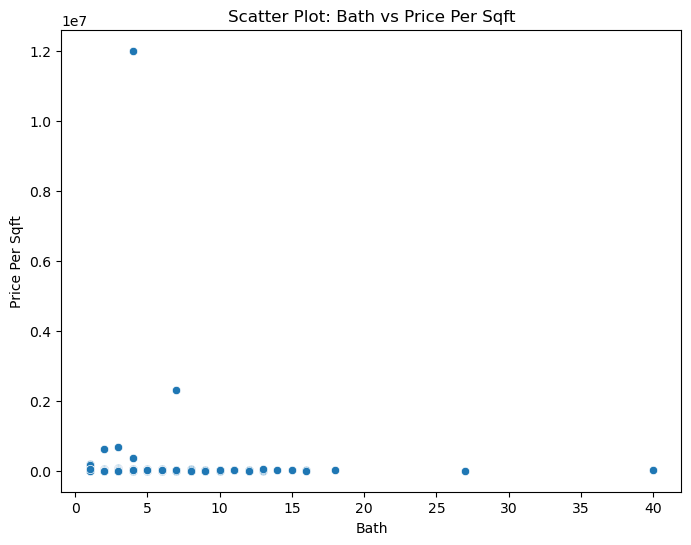

In [101]:
# Bath vs Price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price_per_sqft',data=df)
plt.title('Scatter Plot: Bath vs Price Per Sqft')
plt.xlabel('Bath')
plt.ylabel('Price Per Sqft')
plt.show()


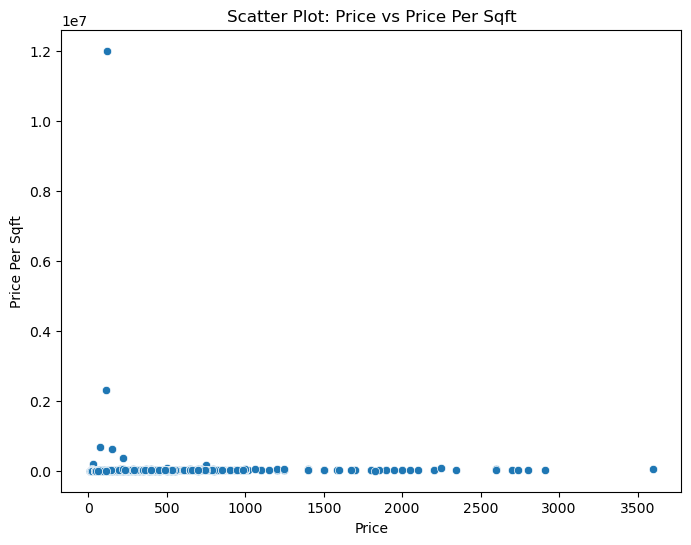

In [103]:
# Price vs Price Per Sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='price_per_sqft',data=df)
plt.title('Scatter Plot: Price vs Price Per Sqft')
plt.xlabel('Price')
plt.ylabel('Price Per Sqft')
plt.show()


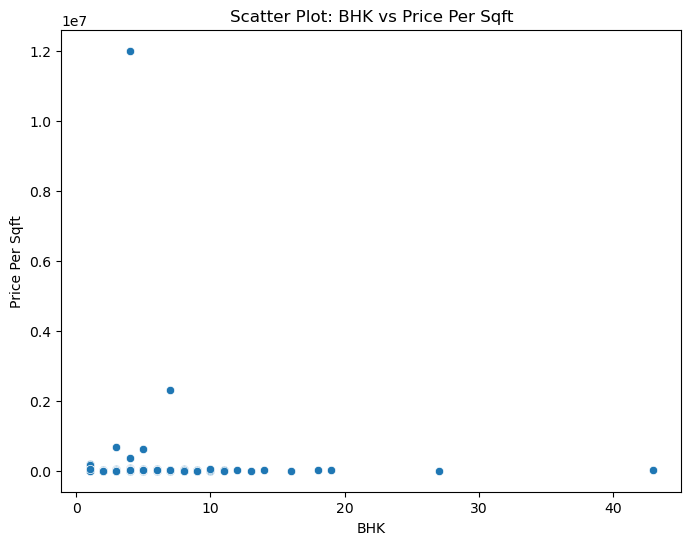

In [105]:
# BHK vs Price_per_sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bhk', y='price_per_sqft',data=df)
plt.title('Scatter Plot: BHK vs Price Per Sqft')
plt.xlabel('BHK')
plt.ylabel('Price Per Sqft')
plt.show()